# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
# Crear el DataFrame con los datos proporcionados
student_data = pd.DataFrame({'Edad': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Retrasos': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

# Mostrar el DataFrame
print("Datos de los estudiantes:")
print(student_data)

Datos de los estudiantes:
   Edad  Retrasos
0    17        10
1    51         1
2    27         5
3    21         9
4    36         4
5    48         2
6    19         9
7    26         6
8    54         0
9    30         3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

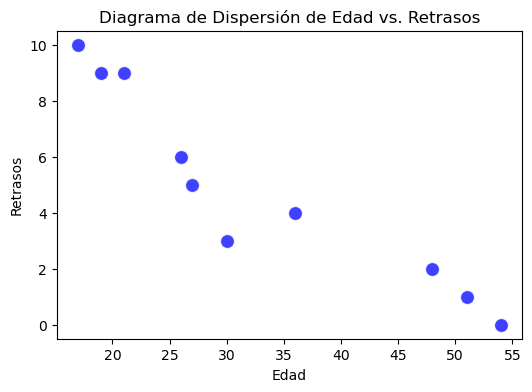

In [4]:
# Your code here
# Graficar el diagrama de dispersión (scatter plot)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Edad', y='Retrasos', data=student_data, s=100, color='blue', alpha=0.75)
plt.title('Diagrama de Dispersión de Edad vs. Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')

plt.show()

**¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?**

Sí, queda claro que cuanto mayor se la edad, menos retrasos hay.

**Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.**

In [7]:
# your code here
# Calcular la covarianza y la correlación
covariance = student_data['Edad'].cov(student_data['Retrasos'])
correlation = student_data['Edad'].corr(student_data['Retrasos'])

# Imprimir los resultados
print(f"Covarianza entre Edad y Retrasos: {covariance:.2f}")
print(f"Correlación entre Edad y Retrasos: {correlation:.2f}")


Covarianza entre Edad y Retrasos: -45.57
Correlación entre Edad y Retrasos: -0.94


La covarianza es una medida de cómo dos variables varían juntas. Un valor positivo de covarianza indica que las variables tienden a aumentar juntas, mientras que un valor negativo indica que una variable tiende a aumentar cuando la otra disminuye. En este caso, la covarianza entre Edad y Retrasos es -45.57, lo que sugiere una tendencia a que los retrasos disminuyan significativamente con la edad.

La correlación es una medida estandarizada que indica la fuerza y dirección de la relación lineal entre dos variables.
La correlación varía entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta,y 0 indica que no hay correlación lineal. En este caso, la correlación entre Edad y Retrasos es -0.94, lo que sugiere una relación negativa fuerte entre la edad y los retrasos.

En resumen, la covarianza negativa indica una relación inversa fuerte entre la edad y los retrasos, mientras que la correlación sugiere que a medida que aumenta la edad, los retrasos tienden a disminuir de manera significativa, con una relación negativa fuerte.

**Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.**

In [8]:
# your explanation here
# Definir las variables independiente y dependiente
X = student_data[['Edad']]  # Variable independiente
y = student_data['Retrasos']  # Variable dependiente

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir los valores usando el modelo ajustado
predictions = model.predict(X)

# Imprimir los coeficientes del modelo
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intersección (Intercepto): {intercept:.2f}")
print(f"Pendiente (Coeficiente): {slope:.2f}")

Intersección (Intercepto): 12.89
Pendiente (Coeficiente): -0.24


Grafica tu modelo de regresión en tu diagrama de dispersión.

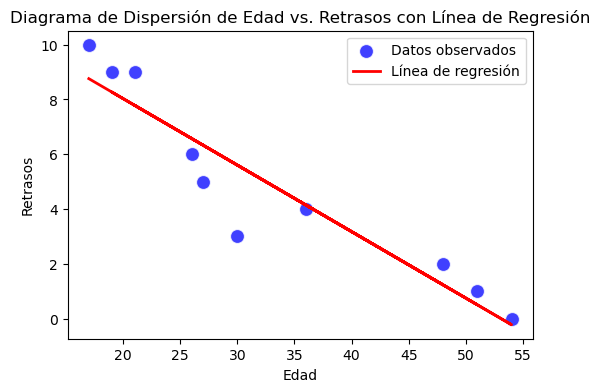

In [10]:
# Your code here.
# Graficar los datos y la línea de regresión
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Edad', y='Retrasos', data=student_data, s=100, color='blue', alpha=0.75, label='Datos observados')
plt.plot(student_data['Edad'], predictions, color='red', linewidth=2, label='Línea de regresión')
plt.title('Diagrama de Dispersión de Edad vs. Retrasos con Línea de Regresión')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.show()


**Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.**

La variable de resultado (dependiente) es 'Retrasos', que estamos tratando de predecir basándonos en la 'Edad'.
Estamos utilizando una regresión lineal simple, que es adecuada cuando tenemos una variable independiente (Edad) y una variable dependiente (Retrasos).
El modelo de regresión lineal se ajusta a los datos observados y proporciona una línea que minimiza la suma de los errores cuadrados entre los datos observados y los valores predichos.
La intersección (intercepto) representa el valor de 'Retrasos' cuando 'Edad' es 0. La pendiente (coeficiente) indica el cambio en 'Retrasos' por cada unidad de cambio en 'Edad'.

El modelo de regresión lineal simple ajustado sugiere una relación negativa entre la edad y los retrasos, lo que apoya la teoría de que los estudiantes más jóvenes tienden a llegar tarde con mayor frecuencia.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

In [13]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [14]:
# Your code here.
# Seleccionar las variables de interés
variables_interes = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles = vehicles[variables_interes]

# Calcular las correlaciones
correlaciones = vehicles.corr()

# Extraer las correlaciones con respecto a 'Emisiones de CO2 Gramos/Milla'
correlaciones_co2 = correlaciones['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')

# Imprimir las correlaciones
print(correlaciones_co2)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Las correlaciones calculadas entre cada variable y las emisiones de CO2 nos permiten entender la relación entre ellas.
Cuanto más cercana esté la correlación a 1 o -1, más fuerte es la relación lineal entre la variable y las emisiones de CO2.
Una correlación positiva indica que, a medida que la variable aumenta, también lo hacen las emisiones de CO2.
Una correlación negativa indica que, a medida que la variable aumenta, las emisiones de CO2 disminuyen.


En nuestro ejemplo, mirando los resultados de las correlaciones, por percibir que la variable más importante seria Barriles de combustible/año.Con una correlación de 0.986189, esta variable es la más importante para determinar las emisiones de CO2. Esto sugiere que el consumo de combustible anual en barriles está fuertemente relacionado con las emisiones de CO2, lo cual es lógico ya que un mayor consumo de combustible generalmente conduce a mayores emisiones.

En cambio, la variable que proporciona la menor cantidad de información útil seria la variable Año. Con una correlación de -0.222300, el año del vehículo proporciona la menor cantidad de información útil para determinar las emisiones de CO2. Aunque hay una ligera relación negativa (los vehículos más nuevos tienden a tener menores emisiones), su influencia es menor en comparación con otras variables.

El consumo de combustible anual (Fuel Barrels/Year) es la variable más crucial para predecir las emisiones de CO2, mientras que el año del vehículo tiene una menor influencia directa. Esto refuerza la importancia del consumo de combustible en la determinación de las emisiones de CO2.


**Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.**

In [20]:
# Your code here.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
import statsmodels.api as sm

# Seleccionar las variables de interés
variables_interes = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles = vehicles[variables_interes]

# Definir las variables independientes (predictoras) y la variable dependiente (resultado)
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Agregar una constante para el término independiente en el modelo
X = sm.add_constant(X)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal múltiple utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realizar predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [25]:
# Imprimir el resumen del modelo
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.005e+05
Date:                     Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                             17:22:30   Log-Likelihood:            -1.2113e+05
No. Observations:                    28761   AIC:                         2.423e+05
Df Residuals:                        28755   BIC:                         2.423e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

**Interpretación de Resultados del Modelo de Regresión**

1. Las variables más importantes en el modelo se pueden identificar observando los coeficientes y los valores p asociados a cada variable. Un valor p bajo (típicamente < 0.05) indica que la variable es estadísticamente significativa.
2. En el resumen, los coeficientes nos indican la magnitud y la dirección del efecto de cada variable predictora en las emisiones de CO2. Por ejemplo, un coeficiente positivo sugiere que un aumento en esa variable resultará en un aumento en las emisiones de CO2, mientras que un coeficiente negativo sugiere lo contrario.
3. El R-cuadrado (R²) ajustado nos da una medida de qué tan bien las variables independientes explican la variabilidad de la variable dependiente. Un valor más alto indica un mejor ajuste.

**Variables más importantes en el modelo:**

*Fuel Barrels/Year:*
Coeficiente: 19.2310
P-valor: 0.000
Interpretación: Esta variable tiene el coeficiente más alto, lo que indica que un aumento de un barril de combustible por año se asocia con un aumento de aproximadamente 19.23 gramos de CO2 emitidos por milla. Es altamente significativa debido a su p-valor extremadamente bajo.


*Combined MPG:*
Coeficiente: -2.9336
P-valor: 0.000
Interpretación: Este coeficiente negativo indica que un aumento en el MPG combinado está asociado con una disminución en las emisiones de CO2. Por cada aumento de una unidad en el MPG combinado, las emisiones de CO2 disminuyen en aproximadamente 2.93 gramos por milla. Este resultado es altamente significativo.


**Conclusiones del Modelo:**
Fuel Barrels/Year es la variable más importante en el modelo debido a su alto coeficiente y significancia estadística. Esto sugiere que la cantidad de combustible consumido anualmente tiene un impacto significativo en las emisiones de CO2 de un vehículo.

Combined MPG también es crucial, con un coeficiente negativo que indica que una mayor eficiencia en el consumo de combustible (más MPG) reduce significativamente las emisiones de CO2.

Fuel Cost/Year y Cylinders son variables importantes pero tienen un impacto menor en comparación con Fuel Barrels/Year y Combined MPG.

Year muestra que los vehículos más nuevos son más eficientes en términos de emisiones de CO2, lo cual es consistente con las mejoras tecnológicas y regulaciones ambientales más estrictas.

**Confianza en las Conclusiones:**

R-squared (R²) de 0.981: Este valor indica que el modelo explica el 98.1% de la variabilidad en las emisiones de CO2, lo cual es un ajuste excelente.
P-valores bajos para todas las variables: Esto indica que las variables son estadísticamente significativas y contribuyen de manera relevante al modelo.
Condición de número alto (6.2e+05): Este alto valor sugiere que podría haber multicolinealidad entre las variables independientes, lo cual podría afectar la estabilidad de los coeficientes estimados. Esto requiere una investigación adicional para asegurar que las conclusiones no estén influenciadas por la multicolinealidad.


El modelo de regresión lineal múltiple ajustado muestra que las emisiones de CO2 de los vehículos están significativamente influenciadas por el consumo anual de combustible, la eficiencia del combustible (MPG), el costo del combustible anual, el número de cilindros y el año del vehículo. El alto valor de R² y los bajos p-valores sugieren que las conclusiones son confiables, aunque la posible multicolinealidad debe ser abordada para garantizar la robustez del modelo.
Es también importante considerar que la relación observada puede estar influenciada por otros factores no incluidos en el modelo.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [27]:
# Your code here.
# Datos proporcionados
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

# Construir DataFrame
df = pd.DataFrame(data)


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [33]:
# Ajuste de modelo de regresión lineal
X = df[['X']]
y = df['Y']

# Agregar una constante para el término independiente en el modelo
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y, X).fit()

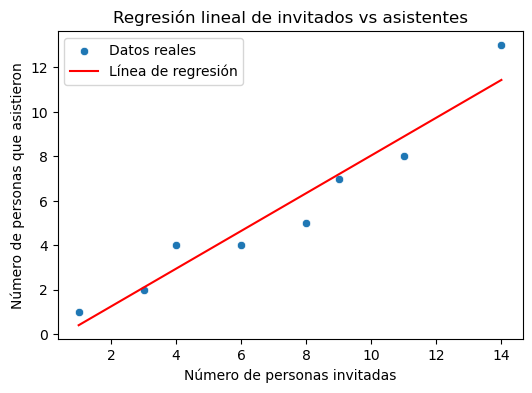

In [35]:
# Predicciones
y_pred = model.predict(X)

# Gráfico con línea de regresión
plt.figure(figsize=(6, 4))
sns.scatterplot(x='X', y='Y', data=df, label='Datos reales')
plt.plot(df['X'], y_pred, color='red', label='Línea de regresión')
plt.title('Regresión lineal de invitados vs asistentes')
plt.xlabel('Número de personas invitadas')
plt.ylabel('Número de personas que asistieron')
plt.legend()
plt.show()

**¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.**

Con el diagrama de dispersión observamos visualmente la relación entre el número de personas invitadas y el número de personas que asistieron.

In [31]:
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           0.000102
Time:                        17:53:55   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\lisan\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Con los resultados del modelo de regresión observamos que:

El valor de 0.932 de R-squared (R²) indica que el 93.2% de la variabilidad en el número de personas que asistieron (Y) se explica por el número de personas invitadas (X). Esto sugiere que el modelo ajusta bien los datos.

El coeficiente de X positivo significa que, en promedio, por cada persona adicional invitada, el número de asistentes aumenta en aproximadamente 0.85. El p-valor muy bajo (< 0.05) indica que esta variable es estadísticamente significativa.
Constante:

La constante no es estadísticamente significativa (p-valor > 0.05), lo que sugiere que no tiene un impacto relevante en el modelo.

El valor del F-statistic es alto y su p-valor es muy bajo, lo que indica que el modelo en su conjunto es significativo.

Relación Lineal: Los resultados indican una fuerte relación lineal entre el número de personas invitadas y el número de personas que asistieron, respaldada por el alto valor de R² y el bajo p-valor para la variable X.

Importancia de X: La variable X (número de personas invitadas) es altamente significativa para predecir Y (número de asistentes).
Significado de la Constante: Aunque la constante no es significativa, esto no afecta la relación lineal observada entre las variables.

Confianza en el Modelo: La alta R² y los resultados de los diagnósticos de normalidad y autocorrelación nos permiten confiar en que la relación modelada es adecuada y robusta. Sin embargo, siempre es importante considerar más datos para validar y mejorar el modelo.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

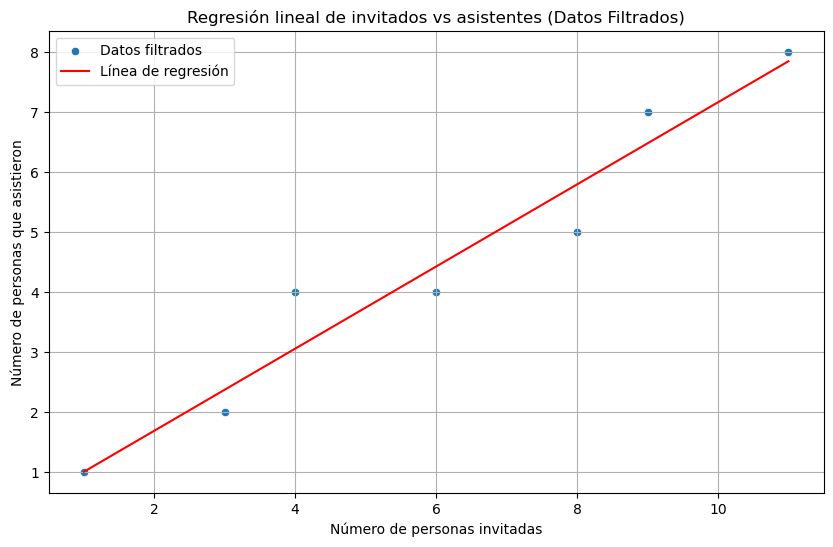

In [36]:
# Your response here.
# Calcular residuos estandarizados
infl = model.get_influence()
standardized_residuals = infl.resid_studentized_internal

# Identificar valores atípicos (umbral típico es > |2|)
outliers = np.where(np.abs(standardized_residuals) > 2)
outliers_indices = outliers[0]

# Eliminar valores atípicos del DataFrame
df_filtered = df.drop(outliers_indices)

# Recalcular la regresión con datos filtrados
X_filtered = df_filtered[['X']]
y_filtered = df_filtered['Y']
X_const_filtered = sm.add_constant(X_filtered)
model_filtered = sm.OLS(y_filtered, X_const_filtered).fit()
y_pred_filtered = model_filtered.predict(X_const_filtered)

# Gráfico de dispersión con línea de regresión del nuevo modelo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df_filtered, label='Datos filtrados')
plt.plot(df_filtered['X'], y_pred_filtered, color='red', label='Línea de regresión')
plt.title('Regresión lineal de invitados vs asistentes (Datos Filtrados)')
plt.xlabel('Número de personas invitadas')
plt.ylabel('Número de personas que asistieron')
plt.legend()
plt.grid(True)
plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

In [37]:
# Imprimir resumen del nuevo modelo
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           0.000264
Time:                        18:11:21   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

C:\Users\lisan\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


El R² ha aumentado ligeramente a 0.943 desde 0.932, lo que indica que el nuevo modelo explica un 94.3% de la variabilidad en los datos. Esto sugiere que el modelo ajustado sin los valores atípicos tiene una mejor capacidad explicativa.

Al eliminar los valores atípicos, hemos mejorado ligeramente el ajuste del modelo. Esto se observa en el aumento de R² y la disminución de AIC y BIC.
El coeficiente de regresión para el número de invitados sigue siendo positivo y significativo, lo que respalda la hipótesis de que invitar a más personas resulta en más asistentes, aunque la relación no es perfecta.